In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [17]:
df = pd.read_csv('C:\\Users\\xps\\Documents\\sv nam 2\\IAI\\Craw\\Comment.csv')

In [18]:
df.drop_duplicates()

,commenter_id,commenter_name,comment_text,comment_time
0,100043997325521,Thằng Anh Con Em,Nghe riết cái thấy cũng thích thích hay hay 🤣,2023-11-23 00:00:00
1,100082965051760,Trang Lê,Bài gì z:)),2023-11-23 00:00:00
2,100066800510946,Bích Trâm,Nghe xong ăn mì 3 miền,2023-11-23 00:00:00
3,100022189274901,Trần Diệu Hiền,"Này thiệt nha, kiểu bị cuốn cuốn sao í🐸",2023-11-23 00:00:00
4,100091124224730,Hân Lê,Hay,2023-11-23 00:00:00
...,...,...,...,...
7466,100029720314950,Kiều Hồ Trung Dũng,Nếu nói theo hướng tích cực thì những cái cây ...,2023-03-30 00:00:00
7467,100022488562817,Đức Đức,Đào Lê Tâm An,2023-03-30 00:00:00
7468,100012760427859,Huỳnh Trang Hoàng Mỹ,"Minh Duy Trịnh Phan để cho dễ nhận diện thuii,...",2023-03-30 00:00:00
7469,100002686756259,Minh Duy Trịnh Phan,Huỳnh Trang Hoàng Mỹ mình thích ý nghĩ của bạn 😁,2023-03-30 00:00:00


In [19]:
# Độ dài trung bình của bình luận
average_comment_length = df['comment_text'].apply(lambda x: len(x)).mean()
print("Độ dài trung bình của bình luận là:", int(average_comment_length), "kí tự")


Độ dài trung bình của bình luận là: 82 kí tự


Từ thông dụng

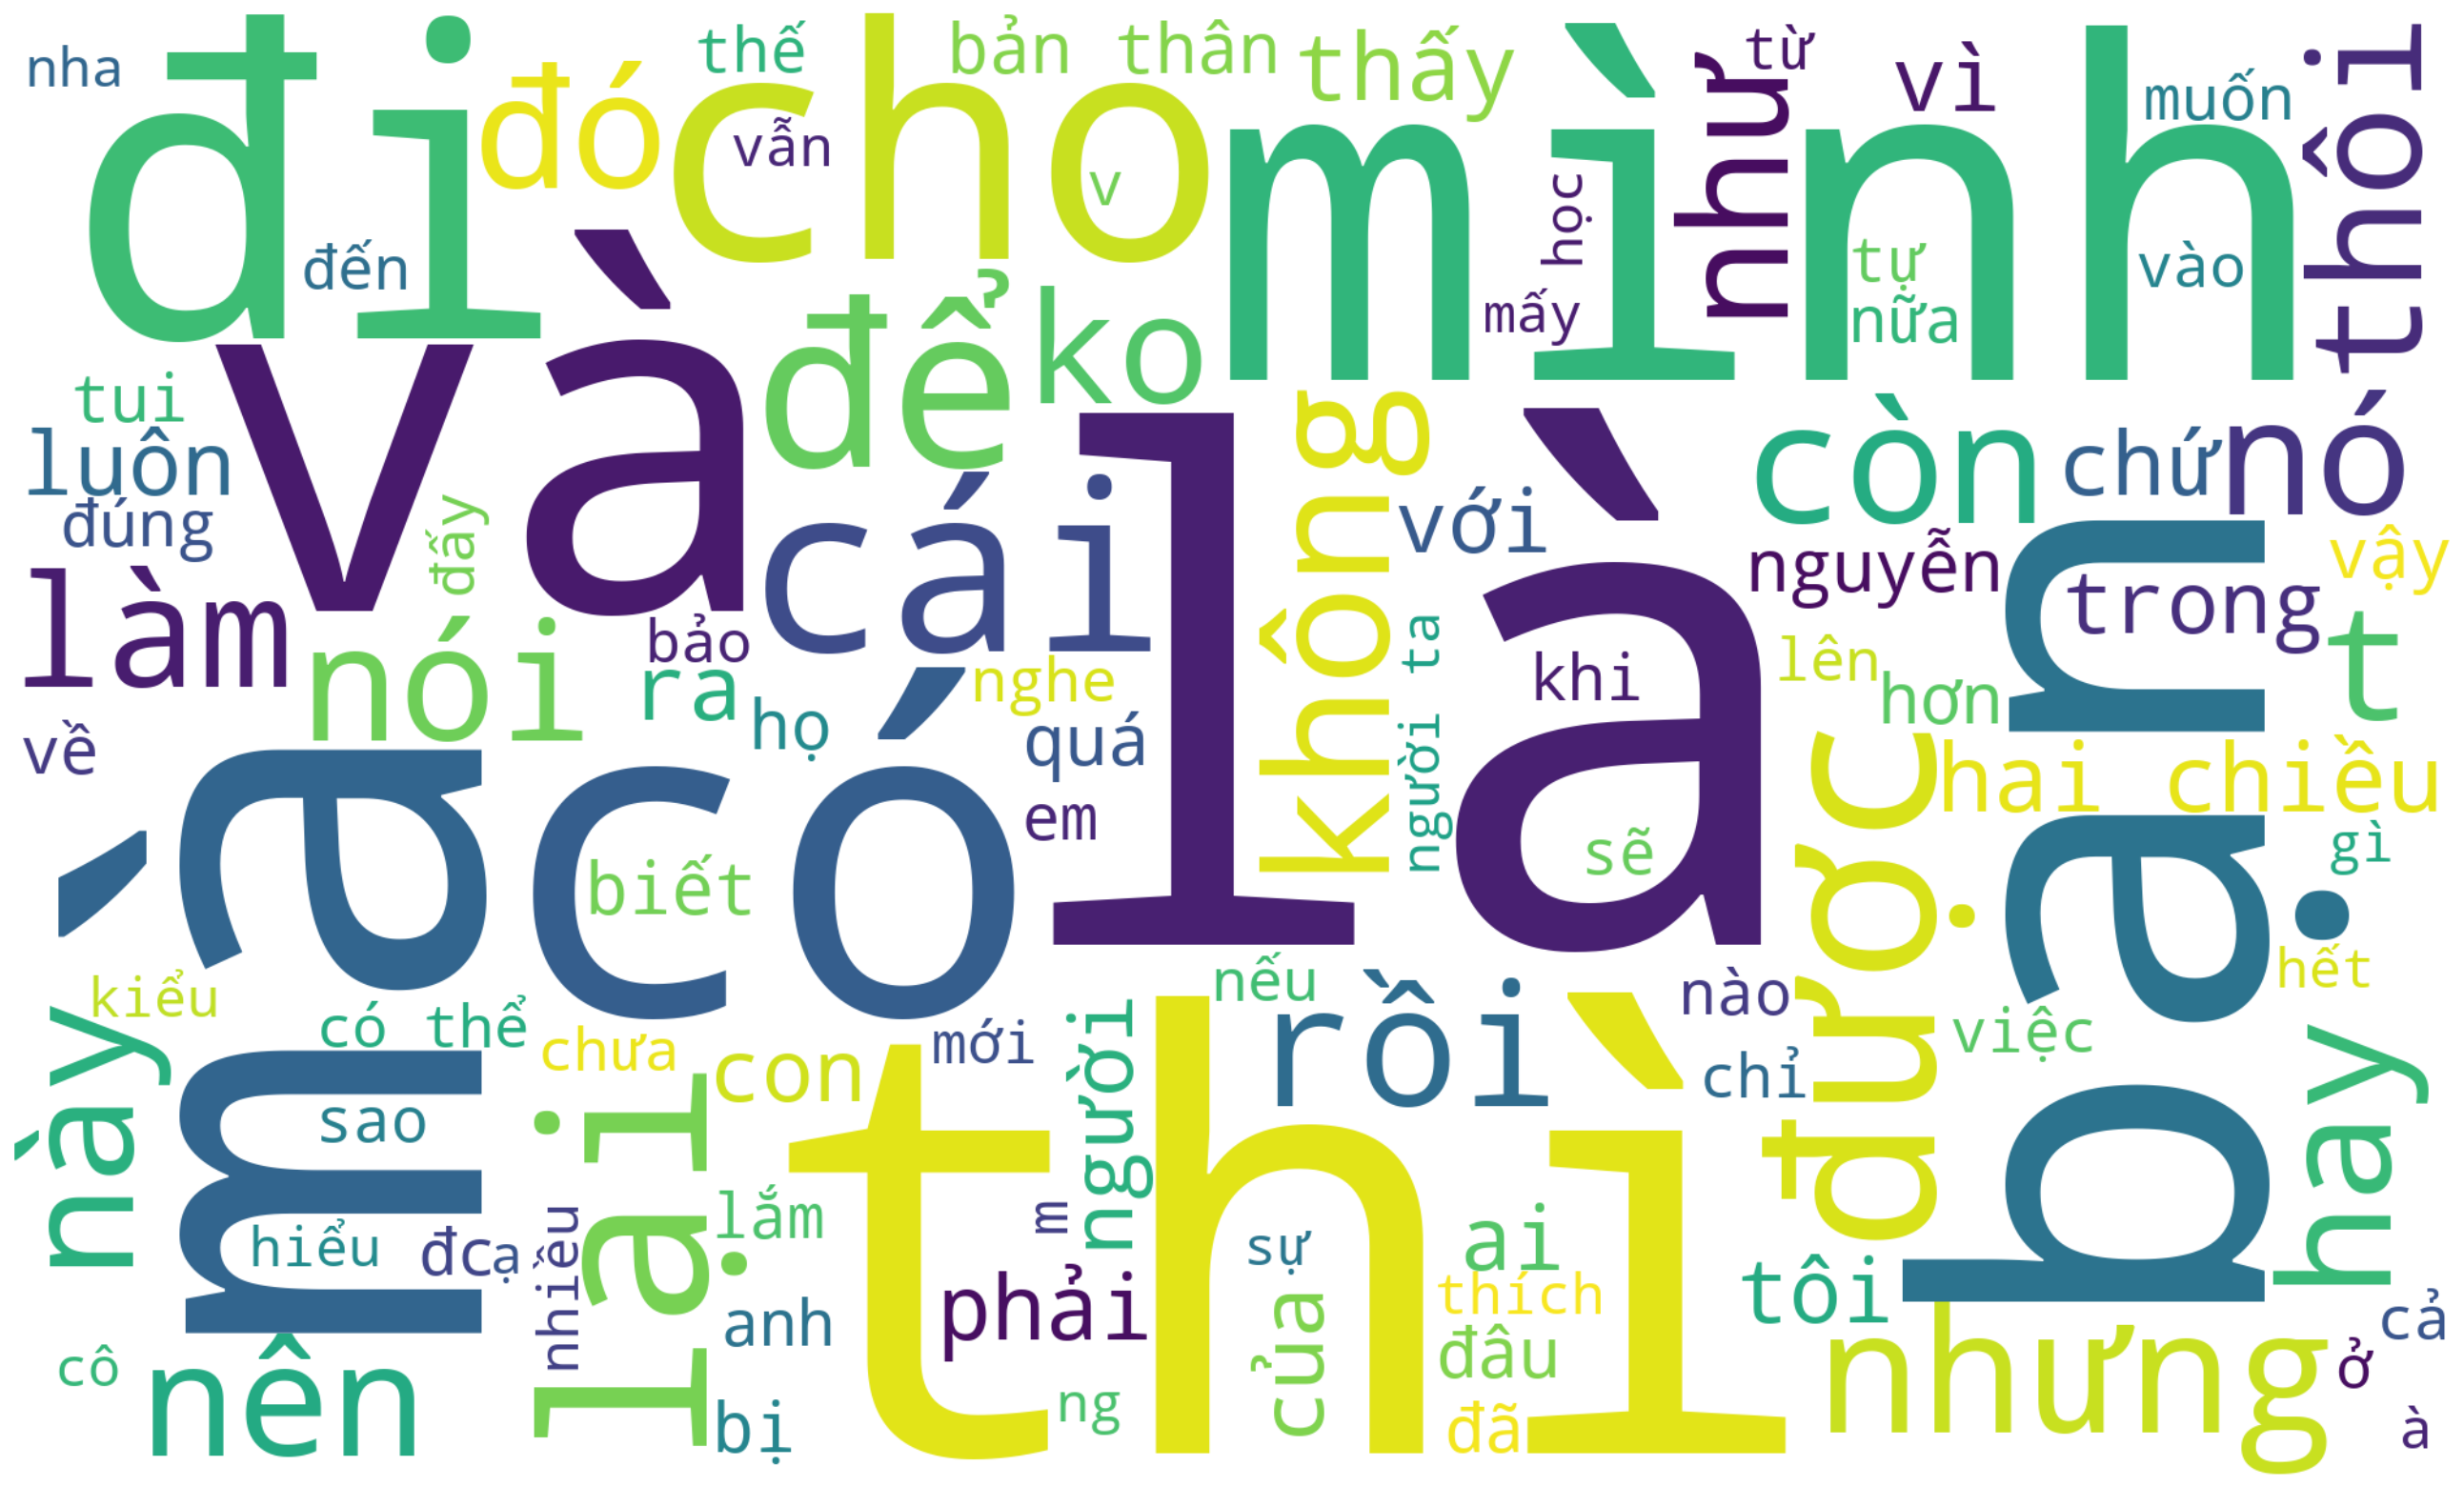

In [20]:
from wordcloud import WordCloud, STOPWORDS
text = pd.Series(df['comment_text'].to_list()).astype(str)
word = (" ".join(text)).lower()

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=100,
                      width=2000, height=1200
                     ).generate(word)

plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
from collections import Counter
text_word = pd.Series(df['comment_text'].to_list()).astype(str)
word = (" ".join(text_word)).lower().split()
word_count = Counter(word)

top_keywords = word_count.most_common(10)


print("10 từ xuất hiện nhiều nhất trong nội luận\n",top_keywords)

10 từ xuất hiện nhiều nhất trong nội luận
 [('là', 2483), ('có', 1951), ('thì', 1610), ('mình', 1565), ('không', 1238), ('người', 1208), ('bạn', 1158), ('mà', 1124), ('cũng', 1041), ('con', 955)]


In [22]:
import pandas as pd
import emoji

# Chuyển cột text thành dạng str
df['comment_text'] = df['comment_text'].astype(str)

# Tạo hàm tính tổng số emoji
def count_emoji(text):
    return emoji.emoji_count(text)

# Thêm cột mới để tính tổng số emoji
df['emoji_count'] = df['comment_text'].apply(count_emoji)

sum_emoji = df[df['emoji_count'] > 0]
print("Có",df['emoji_count'].sum(),"emoji được sử dụng trong 7471 bình luận")

row_count = sum_emoji.shape[0]
print("Trong đó có", row_count,"bình luận sử dụng emoji")


Có 3249 emoji được sử dụng trong 7471 bình luận
Trong đó có 2024 bình luận sử dụng emoji


Sự phát triển của comment theo thời gian

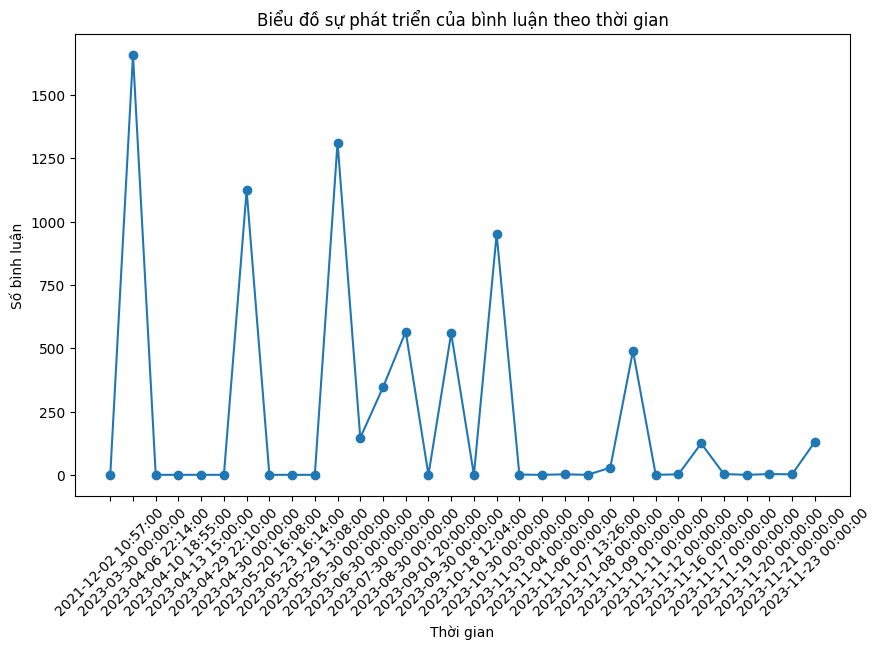

In [23]:
# Đếm số lần xuất hiện của mỗi thời gian
comment_time_counts = df['comment_time'].value_counts().sort_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(comment_time_counts.index, comment_time_counts.values, marker='o', linestyle='-')
plt.title('Biểu đồ sự phát triển của bình luận theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số bình luận')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.show()


Ai là fan cứng ?(Dựa trên số lượt bình luận)

In [24]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu bình luận
# Sử dụng phương thức value_counts() để đếm số lần xuất hiện của mỗi commenter_id
commenter_id_counts = df['commenter_id'].value_counts()

# Tạo DataFrame mới từ Series commenter_id_counts
commenter_counts_df = commenter_id_counts.reset_index()
commenter_counts_df.columns = ['commenter_id', 'count']

# Merge DataFrame mới với DataFrame gốc theo cột commenter_id để lấy thông tin commenter_name
merged_df = pd.merge(commenter_counts_df, df, on='commenter_id')

# Chọn ra 10 người comment nhiều nhất và in ra danh sách
top_5_commenters = merged_df[['commenter_id', 'commenter_name', 'count']].drop_duplicates().head(5).reset_index(drop=True)

print("Top 5 người bình luận nhiều nhất là\n",top_5_commenters)


Top 5 người bình luận nhiều nhất là
       commenter_id    commenter_name  count
0  100044229679401         Hai Chiều    321
1  100043997325521  Thằng Anh Con Em     61
2  100065791324776   Xuân Nghi Vương     44
3  100028374075249  Reanzares Limuel     30
4       1829242625     Phan Hồng Đức     28


Get profile

In [30]:
COOKIE = 'C:\\Users\\xps\\Documents\\sv nam 2\\IAI\\Craw\\cookiess.txt'

In [31]:
from facebook_scraper import get_profile

profile_list = []

for i in range(len(df['commenter_id'])):
    try: 
        profile = get_profile(str(df['commenter_id'].iloc[i]), cookies=COOKIE)
        print(profile)
        profile_list.append(profile)
    except Exception as e:
        continue


c:\Users\xps\AppData\Local\Programs\Python\Python311\Lib\site-packages\facebook_scraper\facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(


{'Friend_count': None, 'Follower_count': None, 'Following_count': 31, 'cover_photo_text': 'Ảnh bìa: Ảnh của Thằng Anh Con Em.', 'cover_photo': 'https://scontent.fhan14-1.fna.fbcdn.net/v/t39.30808-6/333636218_3354019468248152_5741489568714952842_n.png?_nc_cat=105&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=R4mlyCRF2IUAX-X9X_T&_nc_ht=scontent.fhan14-1.fna&oh=00_AfAeTlevJ3M-M-aeEi8vQyrYPSlnniWis6NaX3zBg_GR3A&oe=65738761&manual_redirect=1', 'profile_picture': 'https://scontent.fhan14-1.fna.fbcdn.net/v/t39.30808-6/291746296_5884507098245754_3869032510381006087_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=1&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=xLnQbMyDP6IAX_lI9WP&_nc_ht=scontent.fhan14-1.fna&oh=00_AfA2WM8XoI-vmcRuAdQlxtamvEA1ug1Y7osVMX8G1H4oUg&oe=6573085A&manual_redirect=1', 'id': '100043997325521', 'Name': 'Thằng Anh Con Em', 'Hạng mục': 'Cộng đồng', 'Thông tin liên hệ': '/thanganhconem\nFacebook', 'Thông tin cơ bản': 'Ngày sinh', 'Tính minh bạch của Trang\nXem tất cả': 'Xem tất 

c:\Users\xps\AppData\Local\Programs\Python\Python311\Lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100066800510946%3A103382489711013%3A33&paipv=0&eav=AfYeQwKZKxx4MYCET4V86bHaBfiT48zPdbz-RC-RonVYefAmZjYHzYXlhB2-L1oNhEE&_rdr
  warnings.warn(


{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100066800510946', 'Name': 'Bích Trâm', 'Học vấn': 'Đại học Văn Hiến\nCao đẳng/Đại học\n1 tháng 10, 2022 - Hiện tại\nTrường THPT Võ Văn Kiệt-Vĩnh Long\nTrường trung học', 'Thông tin liên hệ': '/tram4520\nFacebook\nbizan3003\nInstagram', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


c:\Users\xps\AppData\Local\Programs\Python\Python311\Lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100022189274901%3A103382489711013%3A33&paipv=0&eav=AfY-MJsBaLt_Agp76pPnOMCH7bEI42wEtvGiYRxe90d2fPU9GQUdKX9rleMO28Rg_Vo&_rdr
  warnings.warn(


{'Friend_count': 267, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent.fhan14-1.fna.fbcdn.net/v/t39.30808-6/344270959_127225777009933_9152213460942122244_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=VZ_TYBrfOoEAX_rMa3k&_nc_oc=AQlQVes6M5Iik_Im5aqdjtz9pWJkjeGHPrMmYLowJBvUzNq2ifmKLL2nUeT9FwmuXJu4vFpnH-ehoFVfKYrFE_CR&tn=-wjaAy6HoAskXDQG&_nc_ht=scontent.fhan14-1.fna&oh=00_AfBLifqlU0tbpVbFyrtHRZRljbH-LJuuknWmQjKlqSNP2Q&oe=657491D3&manual_redirect=1', 'id': '100022189274901', 'Name': 'Trần Diệu Hiền', 'Học vấn': 'Trường Đại học Mở TP. HCM - Tư vấn tuyển sinh\n日本語 ● Ngôn ngữ Nhật\nTHPT Số 3 An Nhơn, An Nhơn, Bình Định\nTrường trung học', 'Công việc': 'NikoNiko Japanese Club\n24 tháng 5, 2023 - Hiện tại', 'Thông tin liên hệ': '/hien.trandieu.5264\nFacebook\nnobino_mino\nInstagram\ncrocodil2702\nTikTok', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}
{'Friend_count': Non

c:\Users\xps\AppData\Local\Programs\Python\Python311\Lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100079552307144%3A103382489711013%3A33&paipv=0&eav=AfYYamTzw4daKP1SKV5u2kzYTsKW8XHr0jjZWZFGhSzgne4b_S1O7N0uk9INkgao0uM&_rdr
  warnings.warn(


{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100079552307144', 'Name': 'hong quyen 💤', 'Thông tin liên hệ': '/HquynCuti\nFacebook', 'Sự kiện trong đời': ''}


c:\Users\xps\AppData\Local\Programs\Python\Python311\Lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=61551250733345%3A103382489711013%3A33&paipv=0&eav=AfZ2yBoiJVbiM1GRXx_QV0S7Q_KEov-trzSMJIhn-cX2-Yu58uH4Pr2t3UvNg58Sdk8&_rdr
  warnings.warn(


{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '61551250733345', 'Name': 'Pphuongg', 'Thông tin liên hệ': '/pphuong2208\nFacebook', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100074390505527', 'Name': 'Phương Thúy', 'Sự kiện trong đời': ''}
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Ái Quỳnhh.', 'cover_photo': 'https://scontent.fhan14-4.fna.fbcdn.net/v/t39.30808-6/315884898_195812012933563_1357739852992523586_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=8cixwrbsZlAAX-GuyzZ&_nc_ht=scontent.fhan14-4.fna&oh=00_AfDG4kY1BDejLifEfeJ3KK-S1aXQOSoiQ_G2AXeciIzXNg&oe=6574E16A&manual_redirect=1', 'profile_picture': 'https://scontent.fhan14-1.fna.fbcdn.net/v/t39.30808-6/393137900_340512778463485_2321609350615388398_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_

KeyboardInterrupt: 

In [43]:
# Chỉ lấy các cột cần thiết từ mỗi từ điển
selected_columns = ['id', 'Name','Follower_count', 'Nơi từng sống', 'Học vấn', 'Mối quan hệ', 'Thông tin cơ bản']

# Tạo DataFrame từ list các từ điển chỉ với các cột cần thiết
df = pd.DataFrame([{key: value for key, value in d.items() if key in selected_columns} for d in profile_list])


In [44]:
df

,Follower_count,id,Name,Thông tin cơ bản,Học vấn,Mối quan hệ,Nơi từng sống
0,None,100043997325521,Thằng Anh Con Em,Ngày sinh,NaN,NaN,NaN
1,None,100082965051760,Trang Lê,NaN,NaN,NaN,NaN
2,None,100066800510946,Bích Trâm,NaN,Đại học Văn Hiến\nCao đẳng/Đại học\n1 tháng 10...,Độc thân,NaN
3,None,100022189274901,Trần Diệu Hiền,Nữ\nGiới tính,Trường Đại học Mở TP. HCM - Tư vấn tuyển sinh\...,Độc thân,NaN
4,None,100091124224730,Hân Lê,NaN,NaN,Lucie Tranová\nĐã kết hôn,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại
...,...,...,...,...,...,...,...
790,None,100021180815987,Bạn tạm thời bị chặn,NaN,NaN,NaN,NaN
791,None,100004015930195,Bạn tạm thời bị chặn,NaN,NaN,NaN,NaN
792,None,100010958404370,Bạn tạm thời bị chặn,NaN,NaN,NaN,NaN
793,None,100065224993657,Bạn tạm thời bị chặn,NaN,NaN,NaN,NaN


In [89]:
# Xóa các dòng có giá trị "Bạn tạm thời bị chặn" hoặc "Nội dung không tồn tại" trong cột "Name"
df = df[df['Name'] != 'Bạn tạm thời bị chặn']


In [95]:
df

,Follower_count,id,Name,Thông tin cơ bản,Học vấn,Mối quan hệ,Nơi từng sống
0,NaN,100043997325521,Thằng Anh Con Em,Ngày sinh,NaN,NaN,NaN
1,NaN,100082965051760,Trang Lê,NaN,NaN,NaN,NaN
2,NaN,100066800510946,Bích Trâm,NaN,Đại học Văn Hiến\nCao đẳng/Đại học\n1 tháng 10...,Độc thân,NaN
3,NaN,100022189274901,Trần Diệu Hiền,Nữ\nGiới tính,Trường Đại học Mở TP. HCM - Tư vấn tuyển sinh\...,Độc thân,NaN
4,NaN,100091124224730,Hân Lê,NaN,NaN,Đã kết hôn,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại
...,...,...,...,...,...,...,...
61,NaN,61550611575810,The Lyricalogy,Ngày sinh,NaN,NaN,NaN
62,NaN,100090007038592,Quoc Anh Ng,NaN,NaN,Độc thân,NaN
63,NaN,100041235171670,L'une,Ngày sinh,NaN,NaN,NaN
64,NaN,100024095117283,Đặng Bạch Phát,Nam\nGiới tính,Đại học Bách khoa Hà Nội - Hanoi University of...,Độc thân,Hà Nội\nTỉnh/Thành phố hiện tại\nHà Nội\nQuê quán


<Axes: >

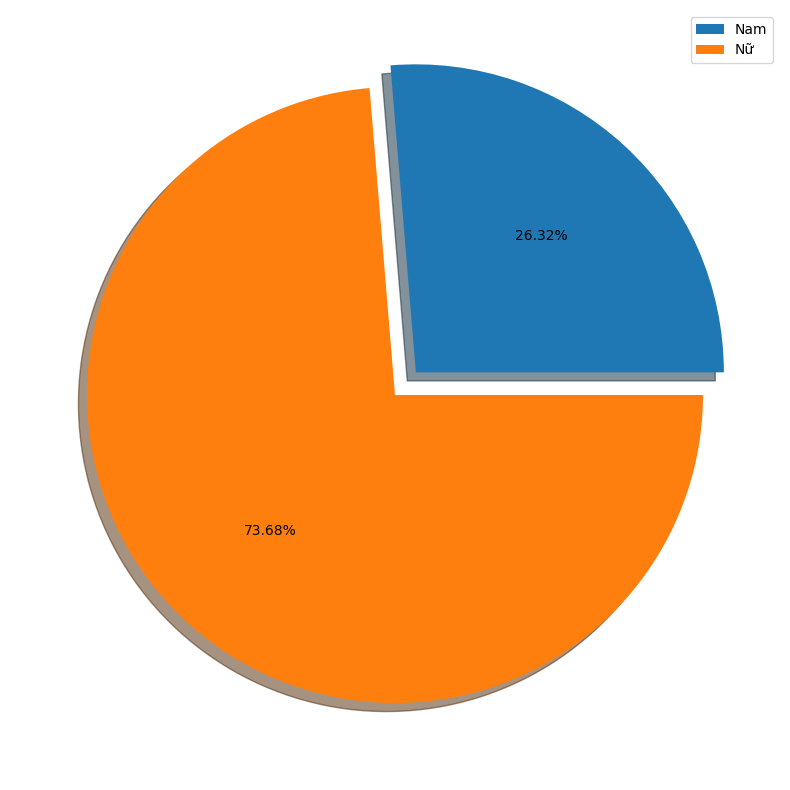

In [92]:
temp = {}
for i in df['Thông tin cơ bản']:
    s = str(i).split('\n')
    for j in range(len(s)):
        if s[j]=="Giới tính":
            if s[j-1] not in temp:
                temp[s[j-1]]=1
            else:
                temp[s[j-1]]+=1
Gioi_tinh = []
Gioi_tinh.append(temp)
Gioi_tinh = pd.DataFrame(columns=['Nam', 'Nữ'], data=Gioi_tinh)
Gioi_tinh.mean().plot(kind='pie', explode = [0.1, 0], labels = None, figsize=(10,10), shadow = True, legend=True, autopct='%1.2f%%')

In [93]:
temps = {}
tinh = ['An Giang','Bà Rịa - Vũng Tàu','Bạc Liêu','Bắc Giang','Bắc Kạn','Bắc Ninh',
        'Bến Tre','Bình Dương','Bình Định','Bình Phước','Bình Thuận','Cà Mau','Cao Bằng',
        'Cần Thơ','Đà Nẵng','Đắk Lắk','Đắk Nông','Điện Biên','Đồng Nai','Đồng Tháp',
        'Gia Lai','Hà Giang','Hà Nam','Hà Nội','Hà Tĩnh','Hải Dương','Hải Phòng',
        'Hậu Giang','Hòa Bình','Thành phố Hồ Chí Minh','Hưng Yên','Khánh Hòa','Kiên Giang',
        'Kon Tum','Lai Châu','Lạng Sơn','Lào Cai','Lâm Đồng','Long An','Nam Định',
        'Nghệ An','Ninh Bình','Ninh Thuận','Phú Thọ','Phú Yên','Quảng Bình','Quảng Nam',
        'Quảng Ngãi','Quảng Ninh','Quảng Trị','Sóc Trăng','Sơn La','Tây Ninh','Thái Bình',
        'Thái Nguyên','Thanh Hóa','Thừa Thiên Huế','Tiền Giang','Trà Vinh','Tuyên Quang',
        'Vĩnh Long','Vĩnh Phúc','Yên Bái']
bac = []
trung = []
nam = []
word = ''
for i in tinh:
    if i not in temps:
        temps[i]=0
for i in df['Nơi từng sống']:
    for j in tinh:
        if j in str(i):
            temps[j]+=1
            word=word+j+' '
Dia_chi = []
Dia_chi.append(temps)
Dia_chi = pd.DataFrame(Dia_chi)

<Axes: >

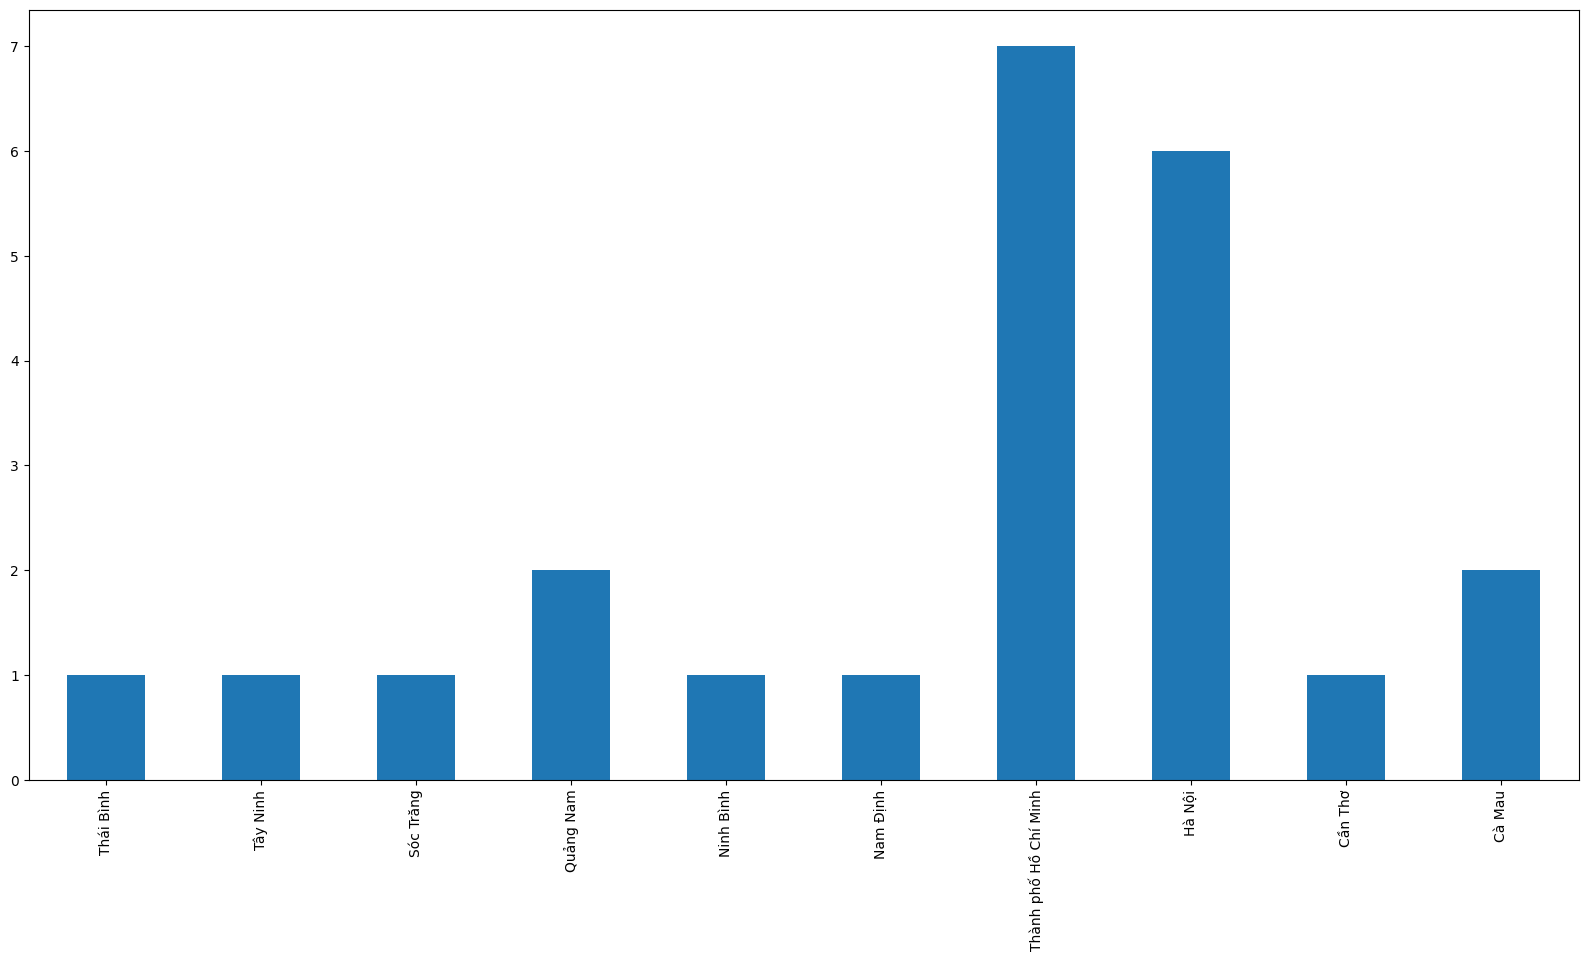

In [94]:
# Xóa các cột có giá trị bằng 0
Dia_chi = Dia_chi.loc[:, (Dia_chi != 0).any()]


a = Dia_chi.loc[0].index[::]
b = a[::-1]
x = Dia_chi.loc[:,b]
x = x.loc[0]
x.plot(kind = 'bar', figsize=(20,10))

<Axes: >

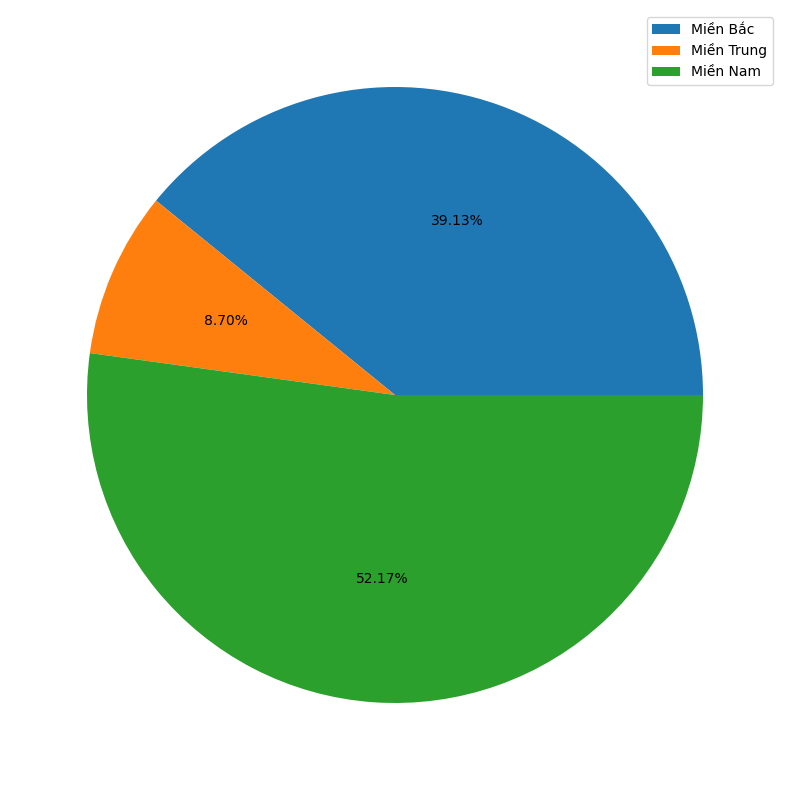

In [65]:
Mien_bac = ['Lào Cai','Yên Bái','Điện Biên','Hòa Bình','Lai Châu','Sơn La',
            'Hà Giang','Cao Bằng','Bắc Kạn','Lạng Sơn','Tuyên Quang','Thái Nguyên','Phú Thọ','Bắc Giang','Quảng Ninh',
            'Bắc Ninh','Hà Nam','Hà Nội','Hải Dương','Hải Phòng','Hưng Yên','Nam Định','Ninh Bình','Thái Bình','Vĩnh Phúc']
Mien_trung = ['Thanh Hóa','Nghệ An','Hà Tĩnh','Quảng Bình','Quảng Trị','Thừa Thiên Huế',
              'Đà Nẵng','Quảng Nam','Quảng Ngãi','Bình Định','Phú Yên','Khánh Hòa','Ninh Thuận','Bình Thuận',
              'Kon Tum','Gia Lai','Đắk Lắk','Đắk Nông','Lâm Đồng']
Mien_nam = ['Bình Phước','Bình Dương','Đồng Nai','Tây Ninh','Bà Rịa - Vũng Tàu','Thành phố Hồ Chí Minh',
            'Long An','Đồng Tháp','Tiền Giang','An Giang','Bến Tre','Vĩnh Long','Trà Vinh','Hậu Giang','Kiên Giang','Sóc Trăng','Bạc Liêu','Cà Mau','Cần Thơ']
Mien = {}
Ba_mien = ['Miền Bắc','Miền Trung','Miền Nam']
for i in Ba_mien:
    if i not in Mien:
        Mien[i] = 0
for i in df['Nơi từng sống']:
    for j in Mien_bac:
        if j in str(i):
            Mien['Miền Bắc']+=1
    for j in Mien_trung:
        if j in str(i):
            Mien['Miền Trung']+=1
    for j in Mien_nam:
        if j in str(i):
            Mien['Miền Nam']+=1
mien = []
mien.append(Mien)
Mien = pd.DataFrame(mien)
Mien.loc[0].plot(kind='pie', figsize=(10,10), labels = None, ylabel='', legend=True, autopct='%1.2f%%')

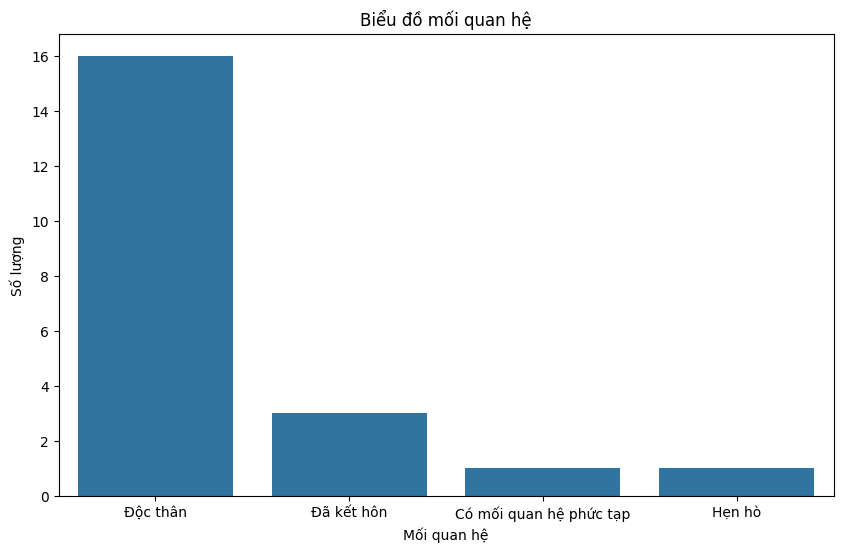

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu từ cột 'Mối quan hệ'
moi_quan_he_values = df['Mối quan hệ']

# Đếm số lượng xuất hiện của mỗi giá trị
count_values = moi_quan_he_values.value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=count_values.index, y=count_values.values)
plt.title('Biểu đồ mối quan hệ')
plt.xlabel('Mối quan hệ')
plt.ylabel('Số lượng')
plt.show()



In [85]:
print("Tỷ lệ số người độc thân chiếm", len(df_filtered_reset) / len(df))

Tỷ lệ số người độc thân chiếm 0.24242424242424243
